In [50]:
import pandas as pd
import os 

TITANIC_PATH = os.path.join("datasets", "titanic") 

def load_titanic_data(titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path + "\\train.csv")
    return pd.read_csv(csv_path)

def load_titaninc_test_data(titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path + "\\test.csv")
    return pd.read_csv(csv_path)

titanic_data = load_titanic_data()

In [51]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
titanic_data["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [53]:
ticketsfirstdigits = []
for x in titanic_data["Ticket"]:
    ticketsfirstdigits.append(ord(str(x)[0]))

#note, in testing it was shown that adding this category
#yields a much higher success when fitting the data
titanic_data["First_Digit"] = ticketsfirstdigits

In [54]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  First_Digit  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [55]:
y_train = titanic_data["Survived"]

In [56]:
X_train = titanic_data.drop("Survived", axis = 1)

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  First_Digit  891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
from sklearn.preprocessing import OrdinalEncoder

sex_category = titanic_data[["Sex"]]
ordinal_encoder = OrdinalEncoder()
sex_category_encoded = ordinal_encoder.fit_transform(sex_category)

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

modifiedX_train = X_train.drop("Age", axis = 1)
modifiedX_train = modifiedX_train.drop("Cabin", axis = 1)
modifiedX_train = modifiedX_train.drop("Embarked", axis = 1)
modifiedX_train = modifiedX_train.drop("Name", axis = 1)
modifiedX_train = modifiedX_train.drop("Ticket", axis = 1)



modifiedX_train["Sex"] = sex_category_encoded

cross_val_score(forest_clf, modifiedX_train, y_train, cv=3, scoring="accuracy")

array([0.8013468 , 0.75757576, 0.80808081])

In [60]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_Digit
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,65
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,80
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,83
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,49
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,51


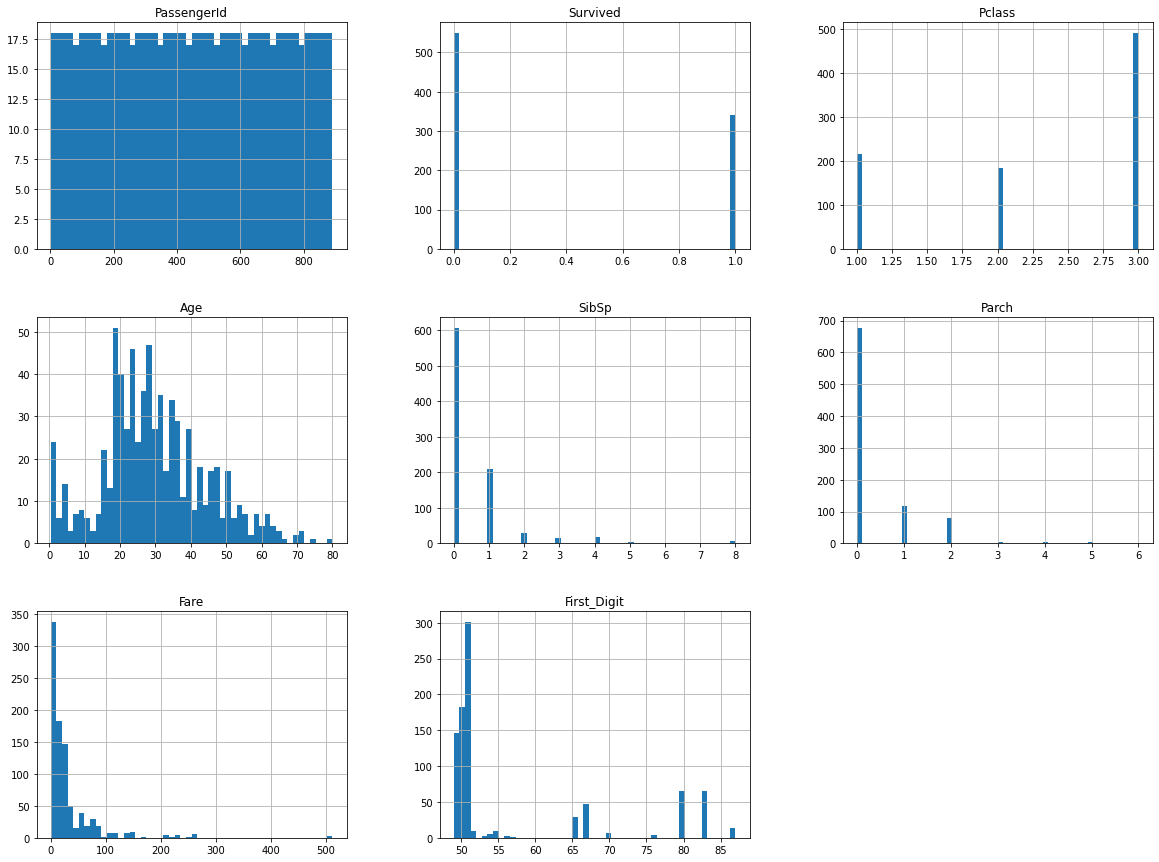

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic_data.hist(bins=50, figsize=(20,15))

plt.show()

In [63]:
uniquepassengerId = np.unique(titanic_data["PassengerId"])

In [64]:
#no duplicates
len(uniquepassengerId)

891

In [82]:

def printColumnsWithDuplicateValues(dataset, lengthUniqueNeeded):
    index = 0
    for x in dataset:
        index = index+1
        #object types and string types almost certain to have duplicates
        #eg cabin, and name...
        if dataset[x].dtype == str or dataset[x].dtype == object:
            continue
        unique = np.unique(dataset[x])    
        lengthUnique = len(unique)
        if(lengthUnique < lengthUniqueNeeded):
            print(x, "has duplicates")
        
printColumnsWithDuplicateValues(titanic_data, 891)
    

Survived has duplicates
Pclass has duplicates
Age has duplicates
SibSp has duplicates
Parch has duplicates
Fare has duplicates
First_Digit has duplicates


<AxesSubplot:xlabel='First_Digit', ylabel='Pclass'>

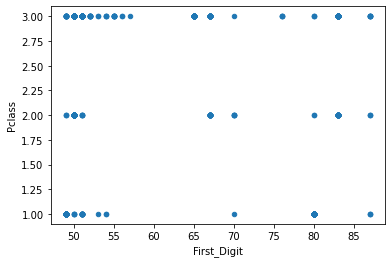

In [84]:
titanic_data.plot(kind="scatter", x="First_Digit", y="Pclass")


array([[<AxesSubplot:xlabel='First_Digit', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='Age', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='SibSp', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='Parch', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='Pclass', ylabel='First_Digit'>],
       [<AxesSubplot:xlabel='First_Digit', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>],
       [<AxesSubplot:xlabel='First_Digit', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Age', ylabel='SibSp'>,
        <AxesSubplot:xlabel='SibSp', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Parch', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Pclass', ylabel='SibSp'>],
       [<AxesSubplot:xlabel='First_Digit', ylabel='Parch'>,
        <AxesSubplot:xlabel='Age', ylabel='Parch'>,
        <AxesSubplot:xlabel='SibSp', yla

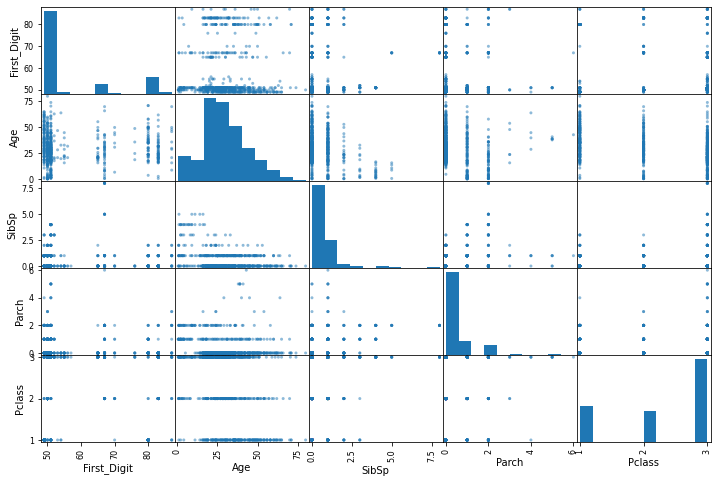

In [89]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["First_Digit", "Age", "SibSp",
              "Parch", "Pclass"]
scatter_matrix(titanic_data[attributes], figsize=(12, 8))


In [91]:
def classifyAge(age):
    if age >= 0 and age <= 17:
        #child
        return 0
    elif age >= 18 and age <= 36:
        #adult
        return 1
    elif age >= 37 and age <= 56:
        #middle age
        return 2
    elif age >= 57:
        #senior
        return 3
    else:
        return -1
    
ageClassified = []
for x in titanic_data["Age"]:
    ageClassified.append(classifyAge(x))

print(len(ageClassified))

891


In [92]:
titanic_data["Age_Clf"] = ageClassified

In [93]:
titanic_data["Age_Clf"].value_counts()

1    406
3    213
2    159
0    113
Name: Age_Clf, dtype: int64

array([[<AxesSubplot:xlabel='First_Digit', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='Age_Clf', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='SibSp', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='Parch', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='Pclass', ylabel='First_Digit'>],
       [<AxesSubplot:xlabel='First_Digit', ylabel='Age_Clf'>,
        <AxesSubplot:xlabel='Age_Clf', ylabel='Age_Clf'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age_Clf'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age_Clf'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age_Clf'>],
       [<AxesSubplot:xlabel='First_Digit', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Age_Clf', ylabel='SibSp'>,
        <AxesSubplot:xlabel='SibSp', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Parch', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Pclass', ylabel='SibSp'>],
       [<AxesSubplot:xlabel='First_Digit', ylabel='Parch'>,
        <AxesSubplot:xlabel='Age_Clf', ylabel='Parch'>,
    

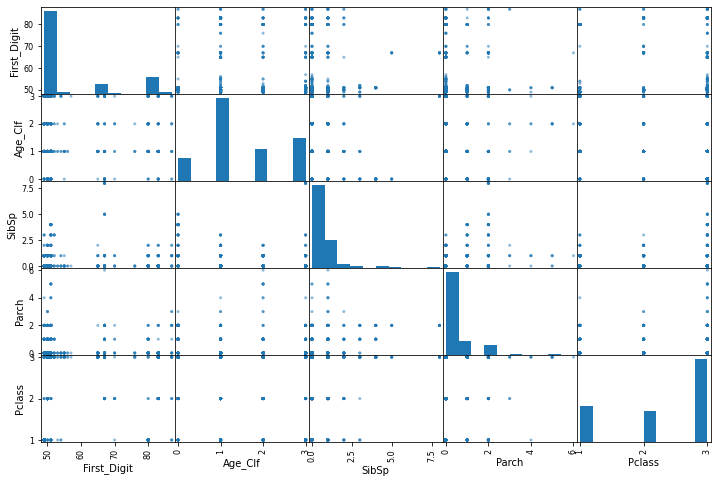

In [94]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["First_Digit", "Age_Clf", "SibSp",
              "Parch", "Pclass"]
scatter_matrix(titanic_data[attributes], figsize=(12, 8))


In [106]:
import math
cabin_first_digit = []
for x in titanic_data["Cabin"]:
    if(str(x) != "nan"):
        cabin_first_digit.append(ord(str(x)[0]))
    else:
        cabin_first_digit.append(-1)


titanic_data["Cabin_First_Digit"] = cabin_first_digit
print(len(titanic_data["Cabin_First_Digit"]))

891


array([[<AxesSubplot:xlabel='First_Digit', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='Age_Clf', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='SibSp', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='Parch', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='Pclass', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='Cabin_First_Digit', ylabel='First_Digit'>],
       [<AxesSubplot:xlabel='First_Digit', ylabel='Age_Clf'>,
        <AxesSubplot:xlabel='Age_Clf', ylabel='Age_Clf'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age_Clf'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age_Clf'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age_Clf'>,
        <AxesSubplot:xlabel='Cabin_First_Digit', ylabel='Age_Clf'>],
       [<AxesSubplot:xlabel='First_Digit', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Age_Clf', ylabel='SibSp'>,
        <AxesSubplot:xlabel='SibSp', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Parch', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Pclass'

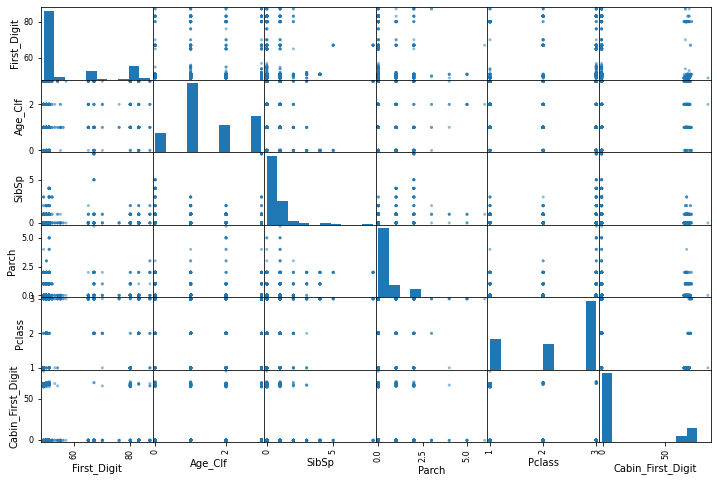

In [107]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["First_Digit", "Age_Clf", "SibSp",
              "Fare", "Pclass", "Cabin_First_Digit"]
scatter_matrix(titanic_data[attributes], figsize=(12, 8))


<AxesSubplot:xlabel='Cabin_First_Digit', ylabel='Pclass'>

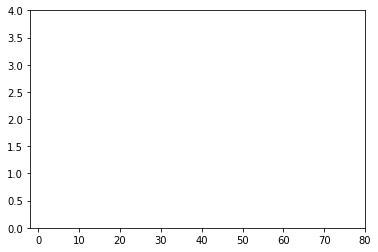

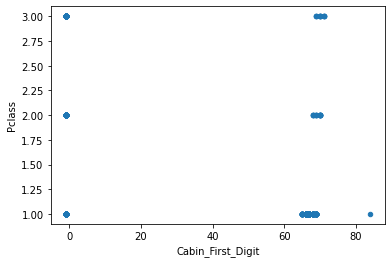

In [111]:

plt.axis([-2, 80, 0, 4])
titanic_data.plot(kind="scatter", x="Cabin_First_Digit", y="Pclass")


In [115]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

modifiedX_train = X_train.drop("Age", axis = 1)
modifiedX_train = modifiedX_train.drop("Cabin", axis = 1)
modifiedX_train = modifiedX_train.drop("Embarked", axis = 1)
modifiedX_train = modifiedX_train.drop("Name", axis = 1)
modifiedX_train = modifiedX_train.drop("Ticket", axis = 1)



modifiedX_train["Sex"] = sex_category_encoded
print(modifiedX_train.value_counts())

cross_val_score(forest_clf, modifiedX_train, y_train, cv=3, scoring="accuracy")

PassengerId  Pclass  Sex  SibSp  Parch  Fare    First_Digit
891          3       1.0  0      0      7.750   51             1
293          2       1.0  0      0      12.875  83             1
304          2       0.0  0      0      12.350  50             1
303          3       1.0  0      0      0.000   76             1
302          3       1.0  2      0      23.250  51             1
                                                              ..
591          3       1.0  0      0      7.125   83             1
590          3       1.0  0      0      8.050   65             1
589          3       1.0  0      0      8.050   49             1
588          1       1.0  1      1      79.200  49             1
1            3       1.0  1      0      7.250   65             1
Length: 891, dtype: int64


array([0.8013468 , 0.75757576, 0.80808081])

In [116]:
modifiedX_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   First_Digit  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [123]:
modifiedX_train["Age_Clf"] = ageClassified
modifiedX_train["Cabin_First_Digit"] = cabin_first_digit


In [124]:
cross_val_score(forest_clf, modifiedX_train, y_train, cv=5, scoring="accuracy")

array([0.77653631, 0.79775281, 0.87640449, 0.80898876, 0.79775281])

In [126]:
#here we use a grid search to see the best paramters for KNeighborsClassifier
#given our scaled X training data and y training data

from sklearn.model_selection import GridSearchCV

forest_clf = RandomForestClassifier()

param_grid = [
    {'n_estimators': [2, 4, 6, 8, 10, 20, 30], 'max_features': ['auto', 'log2']},
  ]

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(modifiedX_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': ['auto', 'log2'],
                          'n_estimators': [2, 4, 6, 8, 10, 20, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [129]:
print(grid_search.best_params_)
#here we set the best paramaters found from grid_search
# forest_clf.set_params(grid_search.best_params_)
# #make sure the params were set correctly
# print(forest_clf.get_params())
best_forest_clf = RandomForestClassifier(n_estimators=30, max_features="auto")

{'max_features': 'auto', 'n_estimators': 30}


In [130]:
print(best_forest_clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [131]:
cross_val_score(best_forest_clf, modifiedX_train, y_train, cv=3, scoring="accuracy")

array([0.7979798 , 0.81481481, 0.78114478])

In [134]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,First_Digit,Age_Clf,Cabin_First_Digit
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,57.099888,1.529742,14.672278
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,12.026941,0.990949,28.790181
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,49.000000,0.000000,-1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,50.000000,1.000000,-1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,51.000000,1.000000,-1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,65.000000,2.000000,-1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,87.000000,3.000000,84.000000


In [135]:
def classifyAge(age):
    if age >= 0 and age <= 17:
        #child
        return 0
    elif age >= 18 and age <= 36:
        #adult
        return 1
    elif age >= 37 and age <= 56:
        #middle age
        return 2
    elif age >= 57:
        #senior
        return 3
    else:
        return -1
    
ageClassified = []
for x in titanic_data["Age"]:
    ageClassified.append(classifyAge(x))

print(len(ageClassified))

891


In [136]:
titanic_data["Age_Clf"] = ageClassified

In [137]:
titanic_data["Age_Clf"].value_counts()

 1    406
-1    178
 2    159
 0    113
 3     35
Name: Age_Clf, dtype: int64

In [138]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           889 non-null    object 
 12  First_Digit        891 non-null    int64  
 13  Age_Clf            891 non-null    int64  
 14  Cabin_First_Digit  891 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 104.5+ KB


In [139]:
newXTrain = titanic_data.drop("Age", axis = 1)
newXTrain = newXTrain.drop("Cabin", axis = 1)

In [140]:
newXTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   SibSp              891 non-null    int64  
 6   Parch              891 non-null    int64  
 7   Ticket             891 non-null    object 
 8   Fare               891 non-null    float64
 9   Embarked           889 non-null    object 
 10  First_Digit        891 non-null    int64  
 11  Age_Clf            891 non-null    int64  
 12  Cabin_First_Digit  891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [143]:
hadAFamilyMember = []

In [145]:
index = 0
for family in titanic_data["SibSp"]:
    family2 = titanic_data["Parch"][index]
    if(family > 0 or family2 > 0):
        hadAFamilyMember.append(1)
    else:
        hadAFamilyMember.append(0)
    index = index + 1

In [146]:
print(len(hadAFamilyMember))

891


In [149]:
index = 0
for had in hadAFamilyMember:
    print(had, titanic_data["Parch"][index], titanic_data["SibSp"][index])
    index = index + 1

1 0 1
1 0 1
0 0 0
1 0 1
0 0 0
0 0 0
0 0 0
1 1 3
1 2 0
1 0 1
1 1 1
0 0 0
0 0 0
1 5 1
0 0 0
0 0 0
1 1 4
0 0 0
1 0 1
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
1 1 3
1 5 1
0 0 0
1 2 3
0 0 0
0 0 0
0 0 0
1 0 1
0 0 0
0 0 0
1 0 1
1 0 1
0 0 0
0 0 0
1 0 2
1 0 1
1 0 1
1 0 1
0 0 0
1 2 1
0 0 0
0 0 0
1 0 1
0 0 0
1 0 2
1 0 1
1 1 4
0 0 0
1 0 1
1 0 1
1 1 0
0 0 0
0 0 0
0 0 0
1 2 1
1 2 5
0 0 0
0 0 0
1 0 1
1 2 3
0 0 0
1 1 1
0 0 0
0 0 0
1 2 4
1 0 2
0 0 0
1 2 5
0 0 0
1 0 1
0 0 0
0 0 0
0 0 0
0 0 0
1 2 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
1 0 3
1 3 1
0 0 0
1 2 3
0 0 0
0 0 0
0 0 0
1 0 1
1 2 1
0 0 0
0 0 0
0 0 0
1 1 0
1 1 0
1 0 1
0 0 0
0 0 0
1 1 0
0 0 0
1 0 2
0 0 0
0 0 0
0 0 0
0 0 0
1 0 1
0 0 0
1 0 1
0 0 0
1 0 1
0 0 0
0 0 0
0 0 0
1 0 1
1 1 0
1 2 4
1 0 2
0 0 0
1 0 1
0 0 0
1 1 0
1 0 1
0 0 0
0 0 0
1 1 1
0 0 0
0 0 0
0 0 0
1 0 1
1 0 1
0 0 0
0 0 0
1 2 0
1 0 1
0 0 0
0 0 0
1 2 0
0 0 0
1 0 1
0 0 0
0 0 0
1 1 1
0 0 0
1 2 2
1 2 0
0 0 0
0 0 0
1 0 1
0 0 0
1 2 0
0 0 0
1 1 0
0 0 0
0 0 0
0 0 0
1 2 8
1 1 0
0 0 0
0 0 0
0 0 0
1 1 4
1 2 0
1 1 

In [150]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           889 non-null    object 
 12  First_Digit        891 non-null    int64  
 13  Age_Clf            891 non-null    int64  
 14  Cabin_First_Digit  891 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 104.5+ KB


In [151]:
titanic_data["Family_Member"] = hadAFamilyMember

In [152]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           889 non-null    object 
 12  First_Digit        891 non-null    int64  
 13  Age_Clf            891 non-null    int64  
 14  Cabin_First_Digit  891 non-null    int64  
 15  Family_Member      891 non-null    int64  
dtypes: float64(2), int64(9), o

In [153]:
newXTrain = X_train.drop("Age", axis = 1)

In [155]:
newXTrain = newXTrain.drop("Cabin", axis = 1)

array([[<AxesSubplot:xlabel='First_Digit', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='Age_Clf', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='Fare', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='Pclass', ylabel='First_Digit'>,
        <AxesSubplot:xlabel='Survived', ylabel='First_Digit'>],
       [<AxesSubplot:xlabel='First_Digit', ylabel='Age_Clf'>,
        <AxesSubplot:xlabel='Age_Clf', ylabel='Age_Clf'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age_Clf'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age_Clf'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age_Clf'>],
       [<AxesSubplot:xlabel='First_Digit', ylabel='Fare'>,
        <AxesSubplot:xlabel='Age_Clf', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>,
        <AxesSubplot:xlabel='Survived', ylabel='Fare'>],
       [<AxesSubplot:xlabel='First_Digit', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age_Clf', ylabel='Pclass'>,
 

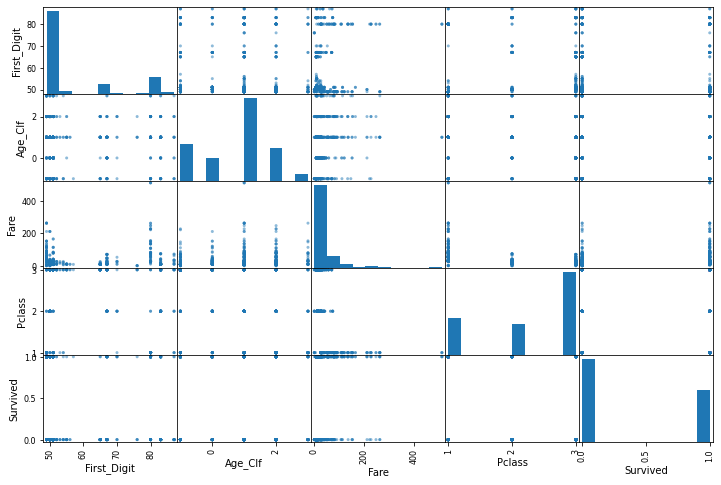

In [159]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["First_Digit", "Age_Clf", 
              "Fare", "Pclass", "Survived"]
scatter_matrix(titanic_data[attributes], figsize=(12, 8))

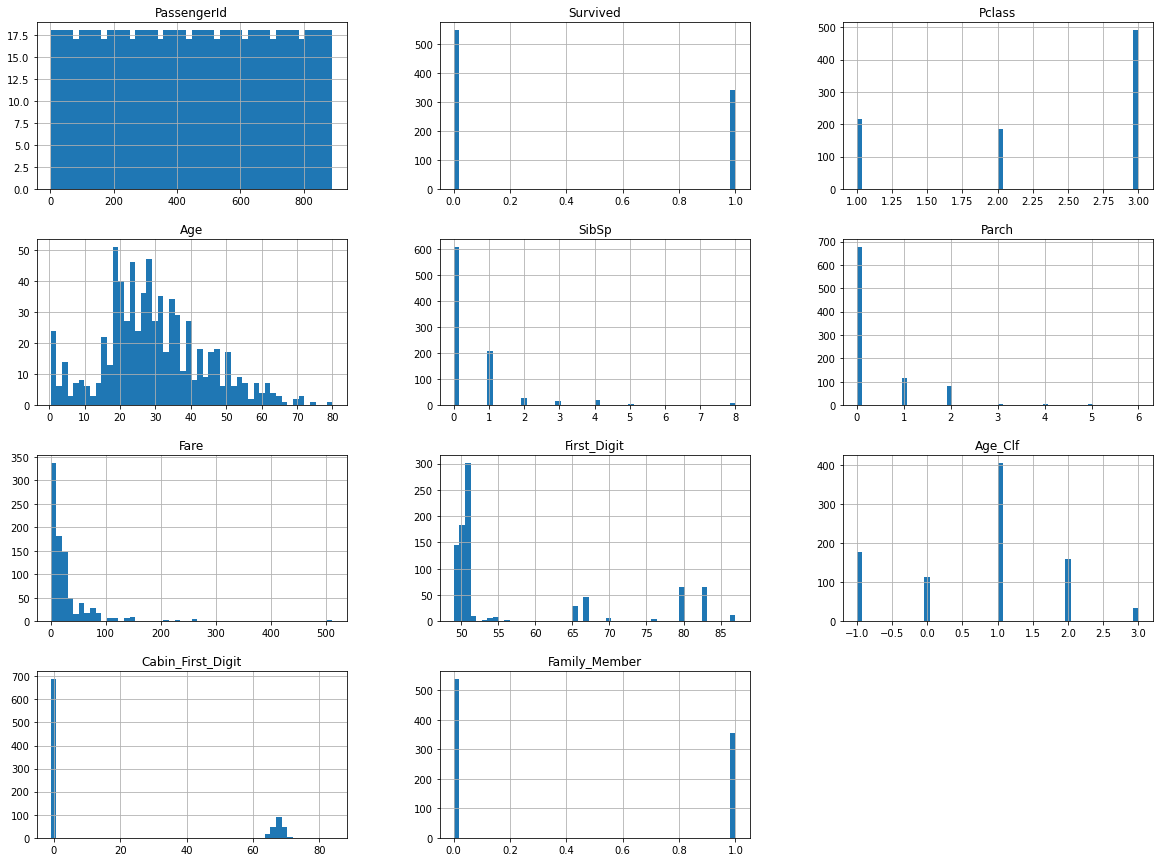

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic_data.hist(bins=50, figsize=(20,15))

plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

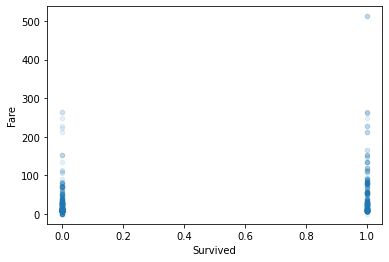

In [162]:
titanic_data.plot(kind="scatter", x="Survived", y="Fare", alpha = 0.1)


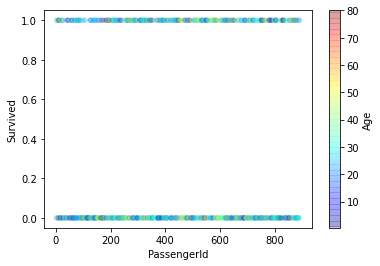

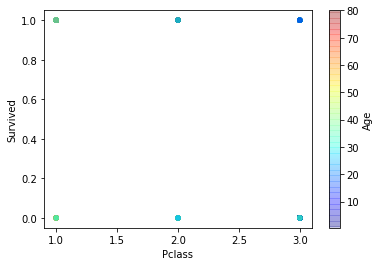

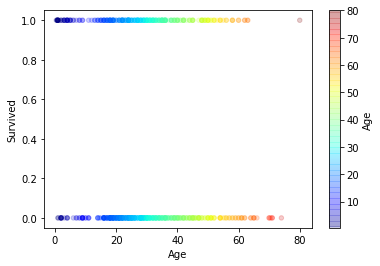

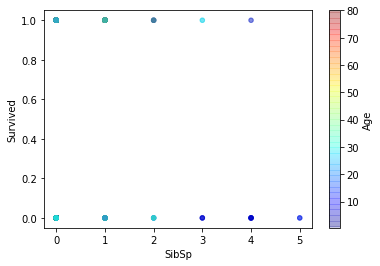

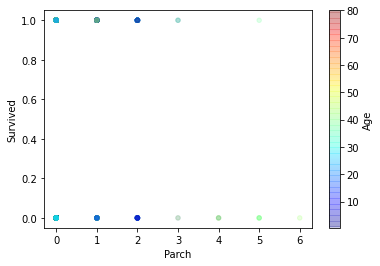

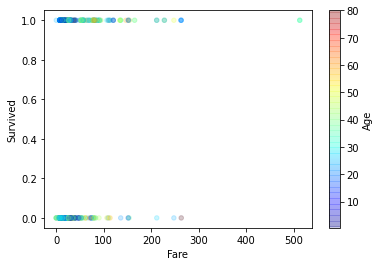

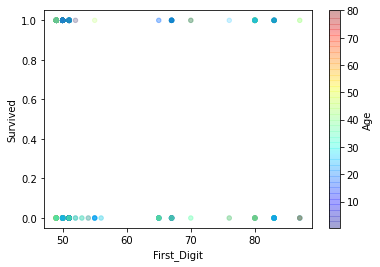

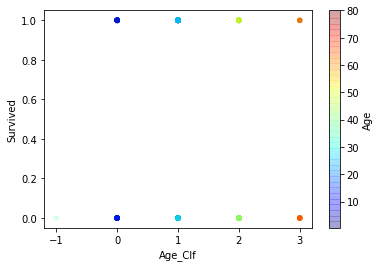

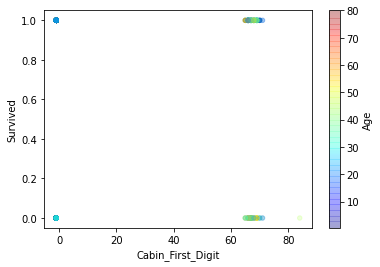

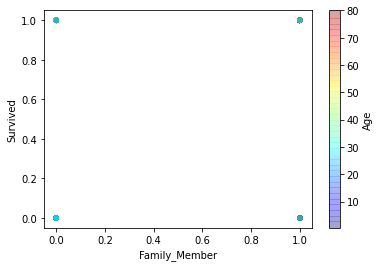

In [173]:
for x in titanic_data:
    if x == "Survived" or titanic_data[x].dtype == str or titanic_data[x].dtype == object:
        continue
    else:
        titanic_data.plot(kind="scatter", x=x, y="Survived", alpha = 0.2, c="Age", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [180]:
newXTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   First_Digit  891 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB


In [269]:
copy_titanic_data = titanic_data.copy()
y_train = titanic_data.copy()
y_train = y_train["Survived"]
copy_titanic_data["Sex"] = sex_category_encoded
ticketsfirstdigits = []
for x in copy_titanic_data["Ticket"]:
    ticketsfirstdigits.append(ord(str(x)[0]))

copy_titanic_data["First_Digit"] = ticketsfirstdigits

index = 0
for i in copy_titanic_data["Embarked"]:
    if(str(i) == "nan"):
        print(i)
        copy_titanic_data = copy_titanic_data.drop([index])
        y_train = y_train.drop([index])
    index = index + 1

print(len(copy_titanic_data))

embarkedfirstdigits = []
for x in copy_titanic_data["Embarked"]:
    embarkedfirstdigits.append(ord(str(x)[0]))

copy_titanic_data["Embarked"] = embarkedfirstdigits


nan
nan
889


In [270]:
print(len(copy_titanic_data), len(y_train))

889 889


In [271]:
copy_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        889 non-null    int64  
 1   Survived           889 non-null    int64  
 2   Pclass             889 non-null    int64  
 3   Name               889 non-null    object 
 4   Sex                889 non-null    float64
 5   Age                712 non-null    float64
 6   SibSp              889 non-null    int64  
 7   Parch              889 non-null    int64  
 8   Ticket             889 non-null    object 
 9   Fare               889 non-null    float64
 10  Cabin              202 non-null    object 
 11  Embarked           889 non-null    int64  
 12  First_Digit        889 non-null    int64  
 13  Age_Clf            889 non-null    int64  
 14  Cabin_First_Digit  889 non-null    int64  
 15  Family_Member      889 non-null    int64  
dtypes: float64(3), int64(10), 

In [272]:
index = 0
for i in copy_titanic_data["Age"]:
    if(str(i) == "nan"):
        print(i)
        copy_titanic_data = copy_titanic_data.drop([index])
        y_train = y_train.drop([index])
    index = index + 1

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [273]:
print(len(copy_titanic_data), len(y_train))

712 712


In [274]:
copy_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        712 non-null    int64  
 1   Survived           712 non-null    int64  
 2   Pclass             712 non-null    int64  
 3   Name               712 non-null    object 
 4   Sex                712 non-null    float64
 5   Age                572 non-null    float64
 6   SibSp              712 non-null    int64  
 7   Parch              712 non-null    int64  
 8   Ticket             712 non-null    object 
 9   Fare               712 non-null    float64
 10  Cabin              162 non-null    object 
 11  Embarked           712 non-null    int64  
 12  First_Digit        712 non-null    int64  
 13  Age_Clf            712 non-null    int64  
 14  Cabin_First_Digit  712 non-null    int64  
 15  Family_Member      712 non-null    int64  
dtypes: float64(3), int64(10), 

In [275]:
copy_titanic_data = copy_titanic_data.drop("Cabin", axis = 1)

In [276]:
copy_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        712 non-null    int64  
 1   Survived           712 non-null    int64  
 2   Pclass             712 non-null    int64  
 3   Name               712 non-null    object 
 4   Sex                712 non-null    float64
 5   Age                572 non-null    float64
 6   SibSp              712 non-null    int64  
 7   Parch              712 non-null    int64  
 8   Ticket             712 non-null    object 
 9   Fare               712 non-null    float64
 10  Embarked           712 non-null    int64  
 11  First_Digit        712 non-null    int64  
 12  Age_Clf            712 non-null    int64  
 13  Cabin_First_Digit  712 non-null    int64  
 14  Family_Member      712 non-null    int64  
dtypes: float64(3), int64(10), object(2)
memory usage: 89.0+ KB


In [277]:
copy_titanic_data = copy_titanic_data.drop("Age", axis = 1)

In [278]:
copy_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        712 non-null    int64  
 1   Survived           712 non-null    int64  
 2   Pclass             712 non-null    int64  
 3   Name               712 non-null    object 
 4   Sex                712 non-null    float64
 5   SibSp              712 non-null    int64  
 6   Parch              712 non-null    int64  
 7   Ticket             712 non-null    object 
 8   Fare               712 non-null    float64
 9   Embarked           712 non-null    int64  
 10  First_Digit        712 non-null    int64  
 11  Age_Clf            712 non-null    int64  
 12  Cabin_First_Digit  712 non-null    int64  
 13  Family_Member      712 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 83.4+ KB


In [279]:
copy_titanic_data = copy_titanic_data.drop("Ticket", axis = 1)

In [280]:
copy_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        712 non-null    int64  
 1   Survived           712 non-null    int64  
 2   Pclass             712 non-null    int64  
 3   Name               712 non-null    object 
 4   Sex                712 non-null    float64
 5   SibSp              712 non-null    int64  
 6   Parch              712 non-null    int64  
 7   Fare               712 non-null    float64
 8   Embarked           712 non-null    int64  
 9   First_Digit        712 non-null    int64  
 10  Age_Clf            712 non-null    int64  
 11  Cabin_First_Digit  712 non-null    int64  
 12  Family_Member      712 non-null    int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 77.9+ KB


In [281]:
copy_titanic_data = copy_titanic_data.drop("SibSp", axis = 1)

In [282]:
copy_titanic_data = copy_titanic_data.drop("Parch", axis = 1)

In [283]:
copy_titanic_data = copy_titanic_data.drop("Name", axis = 1)

In [284]:
copy_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        712 non-null    int64  
 1   Survived           712 non-null    int64  
 2   Pclass             712 non-null    int64  
 3   Sex                712 non-null    float64
 4   Fare               712 non-null    float64
 5   Embarked           712 non-null    int64  
 6   First_Digit        712 non-null    int64  
 7   Age_Clf            712 non-null    int64  
 8   Cabin_First_Digit  712 non-null    int64  
 9   Family_Member      712 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 61.2 KB


In [286]:
copyX_train = copy_titanic_data.drop("Survived", axis = 1)

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)


cross_val_score(forest_clf, copyX_train, y_train, cv=3, scoring="accuracy")

array([0.80252101, 0.77637131, 0.80168776])

In [287]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(copyX_train, y_train)

SGDClassifier(random_state=42)

In [288]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, copyX_train, y_train, cv=3, scoring="accuracy")

array([0.65546218, 0.37130802, 0.37130802])

In [290]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=1000).fit(copyX_train, y_train)

In [291]:
cross_val_score(clf, copyX_train, y_train, cv=3, scoring="accuracy")

array([0.76890756, 0.79746835, 0.7721519 ])

In [300]:
from sklearn.model_selection import GridSearchCV

log_clf = LogisticRegression(max_iter=1000)

param_grid = [
    {'fit_intercept': [True, False], 'class_weight': ["balanced", "dict",  "None"],
     'solver': ["lbfgs", "newton-cg"]}
  ]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(log_clf, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(copyX_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'class_weight': ['balanced', 'dict', 'None'],
                          'fit_intercept': [True, False],
                          'solver': ['lbfgs', 'newton-cg']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [301]:
grid_search.best_params_

{'class_weight': 'dict', 'fit_intercept': True, 'solver': 'lbfgs'}

In [305]:
log_clf = LogisticRegression(max_iter=1000, class_weight="dict", fit_intercept = True, solver = 'lbfgs' )
copyX_train = copyX_train.drop("PassengerId", axis = 1)

In [306]:
from sklearn.model_selection import GridSearchCV

log_clf = LogisticRegression(max_iter=1000)

param_grid = [
    {'fit_intercept': [True, False], 'class_weight': ["balanced", "dict",  "None"],
     'solver': ["lbfgs", "newton-cg"]}
  ]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(log_clf, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(copyX_train, y_train)
log_clf = LogisticRegression(max_iter=1000, class_weight="dict", fit_intercept = True, solver = 'lbfgs' )
copyX_train = copyX_train.drop("PassengerId", axis = 1)
cross_val_score(log_clf, copyX_train, y_train, cv=3, scoring="accuracy")

array([0.7605042 , 0.79324895, 0.76793249])

In [318]:
from sklearn.model_selection import GridSearchCV

log_clf = LogisticRegression(max_iter=10000)

param_grid = [
    {'fit_intercept': [True, False], 'class_weight': ["balanced", None], 
     'solver': ["lbfgs", "newton-cg", 'liblinear', 'sag', 'saga'], 'random_state': [0, 2, 4, 6, 12, 24, 48]}
  ]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(log_clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(copyX_train, y_train)

KeyboardInterrupt: 

In [314]:
grid_search.best_params_

{'class_weight': None, 'fit_intercept': True, 'solver': 'lbfgs'}

In [315]:
log_reg = LogisticRegression(max_iter=10000, fit_intercept=True, solver="lbfgs")

In [316]:
cross_val_score(log_reg, copyX_train, y_train, cv=3, scoring="accuracy")

array([0.7605042 , 0.79324895, 0.76793249])

In [332]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()

param_grid = [
    {'fit_intercept': [True, False], 'eta0': [0.01], 'learning_rate': ['adaptive', 'optimal'], 'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], "penalty": ["l1", "l2", "elasticnet"],
    }
  ]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5,
                           scoring='accuracy',)
grid_search.fit(copyX_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid=[{'eta0': [0.01], 'fit_intercept': [True, False],
                          'learning_rate': ['adaptive', 'optimal'],
                          'loss': ['hinge', 'log', 'modified_huber',
                                   'squared_hinge', 'perceptron'],
                          'penalty': ['l1', 'l2', 'elasticnet']}],
             scoring='accuracy')

In [333]:
grid_search.best_params_

{'eta0': 0.01,
 'fit_intercept': True,
 'learning_rate': 'adaptive',
 'loss': 'log',
 'penalty': 'l2'}

In [335]:
sgd_clf = SGDClassifier(class_weight = 'balanced',
 fit_intercept = True,
  loss = "log",
 penalty =  "l2",
learning_rate = "adaptive",
                       eta0 = 0.01)

In [337]:
cross_val_score(sgd_clf, copyX_train, y_train, cv=5, scoring="accuracy")

array([0.78321678, 0.78321678, 0.8028169 , 0.75352113, 0.76056338])

In [339]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(copyX_train, y_train)

KNeighborsClassifier()

In [340]:
cross_val_score(knn_clf, copyX_train, y_train, cv=5, scoring="accuracy")

array([0.65034965, 0.68531469, 0.76056338, 0.76760563, 0.76760563])

In [346]:
knn_clf = KNeighborsClassifier()

param_grid = [
    {'n_neighbors': [1, 2, 3, 4, 5, 6, 8, 10], 'weights': ["uniform", "distance"], 'algorithm': ["brute", 'ball_tree', 'kd_tree',  "auto"]
    }
  ]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,
                           scoring='accuracy',)
grid_search.fit(copyX_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['brute', 'ball_tree', 'kd_tree',
                                        'auto'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 8, 10],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [347]:
grid_search.best_params_


{'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}

In [348]:
knn_clf = KNeighborsClassifier(algorithm = "ball_tree", n_neighbors = 3, weights = "distance")

In [349]:
cross_val_score(knn_clf, copyX_train, y_train, cv=5, scoring="accuracy")

array([0.70629371, 0.71328671, 0.71126761, 0.75352113, 0.78169014])

In [366]:
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
mlp = MLPClassifier()

param_grid = [
    {'hidden_layer_sizes'=(70,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1]
    }
  ]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,
                           scoring='accuracy',)
grid_search.fit(copyX_train, y_train)



# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(copyX_train, y_train)

Iteration 1, loss = 10.92866364
Iteration 2, loss = 0.67097992
Iteration 3, loss = 0.67481049
Iteration 4, loss = 0.67941966
Iteration 5, loss = 0.69540671
Iteration 6, loss = 0.68919179
Iteration 7, loss = 0.69348015
Iteration 8, loss = 0.69489942
Iteration 9, loss = 0.69583309
Iteration 10, loss = 0.69647928


In [360]:
cross_val_score(mlp, copyX_train, y_train, cv=3, scoring="accuracy")

Iteration 1, loss = 11.69980444
Iteration 2, loss = 0.66484333
Iteration 3, loss = 0.66701554
Iteration 4, loss = 0.67055672
Iteration 5, loss = 0.67503009
Iteration 6, loss = 0.67858543
Iteration 7, loss = 0.68058341
Iteration 8, loss = 0.68153847
Iteration 9, loss = 0.68195112
Iteration 10, loss = 0.68279858
Iteration 1, loss = 11.32331530
Iteration 2, loss = 0.66038799
Iteration 3, loss = 0.65757583
Iteration 4, loss = 0.66308161
Iteration 5, loss = 0.68705087
Iteration 6, loss = 0.67494165
Iteration 7, loss = 0.68084556
Iteration 8, loss = 0.68281456
Iteration 9, loss = 0.68207898
Iteration 10, loss = 0.67940808
Iteration 1, loss = 13.59950992
Iteration 2, loss = 0.66830885
Iteration 3, loss = 0.66904690
Iteration 4, loss = 0.67081548
Iteration 5, loss = 0.67229273
Iteration 6, loss = 0.67489328
Iteration 7, loss = 0.67690557
Iteration 8, loss = 0.67835104
Iteration 9, loss = 0.67942329
Iteration 10, loss = 0.68015075


c:\ml\my_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\ml\my_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\ml\my_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0.6302521 , 0.62869198, 0.62869198])

In [368]:
copyX_train.describe()

,Pclass,Sex,Fare,Embarked,First_Digit,Age_Clf,Cabin_First_Digit,Family_Member
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.307584,0.662921,31.568872,79.924157,57.001404,0.734551,14.596910,0.401685
std,0.836609,0.473044,45.918465,6.109630,11.974128,1.087475,28.773359,0.490584
min,1.000000,0.000000,0.000000,67.000000,49.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,7.895800,81.000000,50.000000,0.000000,-1.000000,0.000000
50%,3.000000,1.000000,14.458300,83.000000,51.000000,1.000000,-1.000000,0.000000
75%,3.000000,1.000000,31.275000,83.000000,65.000000,1.000000,-1.000000,1.000000
max,3.000000,1.000000,512.329200,83.000000,87.000000,3.000000,84.000000,1.000000


In [371]:
newFare = []
for x in copyX_train["Fare"]:
    if x >= 0 and x <= 8:
        newFare.append(0)
    elif x > 8 and x <= 14:
        newFare.append(1)
    elif x > 14 and x <= 32:
        newFare.append(2)
    else:
        newFare.append(3)
print(len(newFare))
copyX_train["Fare"] = newFare

712


In [372]:
copyX_train = copyX_train.drop("Cabin_First_Digit", axis = 1)

In [373]:
copyX_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         712 non-null    int64  
 1   Sex            712 non-null    float64
 2   Fare           712 non-null    int64  
 3   Embarked       712 non-null    int64  
 4   First_Digit    712 non-null    int64  
 5   Age_Clf        712 non-null    int64  
 6   Family_Member  712 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 44.5 KB


In [374]:
copyX_train["Fare"].value_counts()

2    197
0    196
3    169
1    150
Name: Fare, dtype: int64

In [375]:
copyX_train.describe()

,Pclass,Sex,Fare,Embarked,First_Digit,Age_Clf,Family_Member
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.307584,0.662921,1.476124,79.924157,57.001404,0.734551,0.401685
std,0.836609,0.473044,1.129825,6.109630,11.974128,1.087475,0.490584
min,1.000000,0.000000,0.000000,67.000000,49.000000,-1.000000,0.000000
25%,2.000000,0.000000,0.000000,81.000000,50.000000,0.000000,0.000000
50%,3.000000,1.000000,2.000000,83.000000,51.000000,1.000000,0.000000
75%,3.000000,1.000000,2.000000,83.000000,65.000000,1.000000,1.000000
max,3.000000,1.000000,3.000000,83.000000,87.000000,3.000000,1.000000


In [399]:
from sklearn.model_selection import GridSearchCV

log_clf = LogisticRegression(max_iter=3000)

param_grid = [
    {'fit_intercept': [True, False], 'class_weight': ["balanced", None],  'penalty': ["l2"],
     'solver': ["lbfgs", "newton-cg", 'liblinear', 'sag', 'saga'], 'random_state': [0, 2, 4, 6, 12, 24, 48]}
  ]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(log_clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(copyX_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=3000),
             param_grid=[{'class_weight': ['balanced', None],
                          'fit_intercept': [True, False], 'penalty': ['l2'],
                          'random_state': [0, 2, 4, 6, 12, 24, 48],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='accuracy')

In [401]:
grid_search.best_params_


{'class_weight': None,
 'fit_intercept': True,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs'}

In [408]:

log_clf = LogisticRegression(class_weight = None, fit_intercept = True, penalty = "l2", random_state=42, solver="lbfgs", max_iter=3000)
cross_val_score(log_clf, copyX_train, y_train, cv=3, scoring="accuracy")

array([0.76890756, 0.79324895, 0.7721519 ])

In [415]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced_subsample", criterion="entropy")
cross_val_score(forest_clf, copyX_train, y_train, cv=5, scoring = "accuracy")


array([0.78321678, 0.76923077, 0.8028169 , 0.79577465, 0.82394366])